In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

X['y'] = y['y']


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [ ]:
print(X.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  


In [ ]:
print(y.head())
print(y['y'].value_counts())

    y
0  no
1  no
2  no
3  no
4  no
y
no     39922
yes     5289
Name: count, dtype: int64


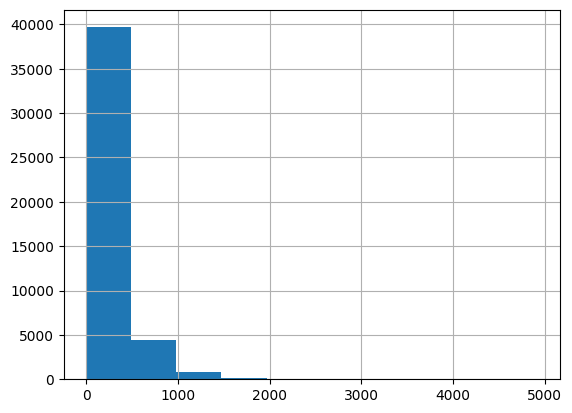

In [ ]:
import matplotlib.pyplot as plt
X['duration'].hist()
plt.show()

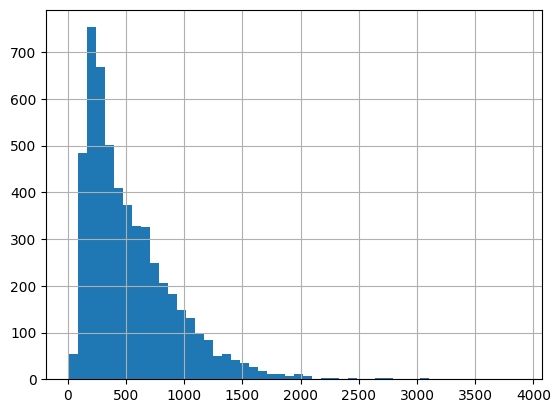

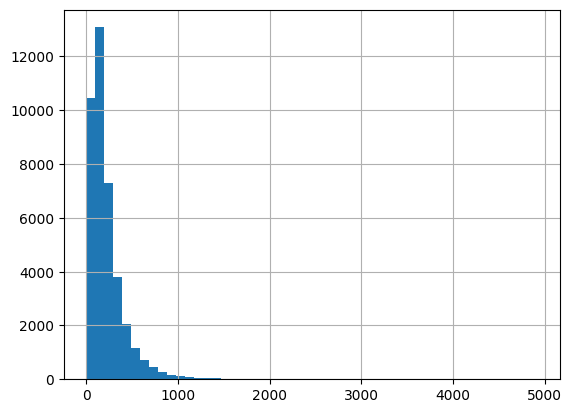

In [ ]:
X_yes = X[y['y'] == 'yes']
X_no = X[y['y'] == 'no']

X_yes['duration'].hist(bins=50)
plt.show()
X_no['duration'].hist(bins=50)

plt.show()

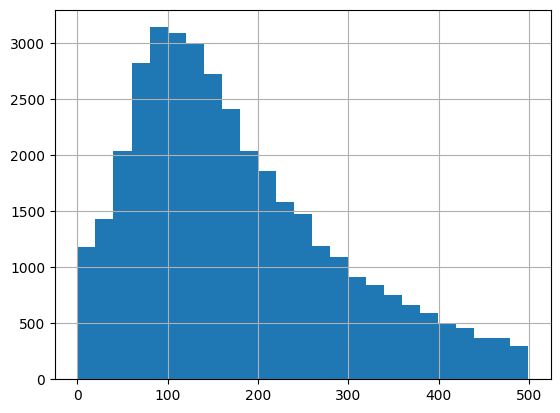

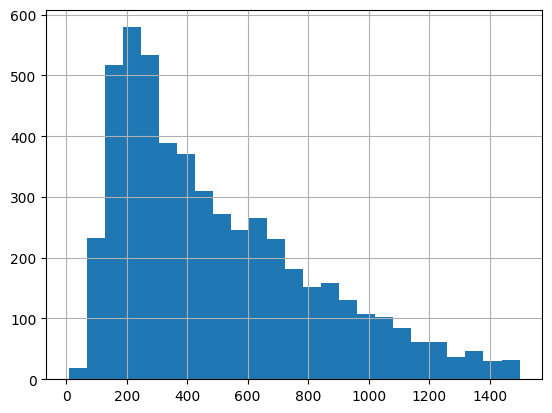

In [ ]:

X_no[X_no['duration']  < 500]['duration'].hist(bins=25)
plt.show()

X_yes[X_yes['duration']  < 1500]['duration'].hist(bins=25)
plt.show()

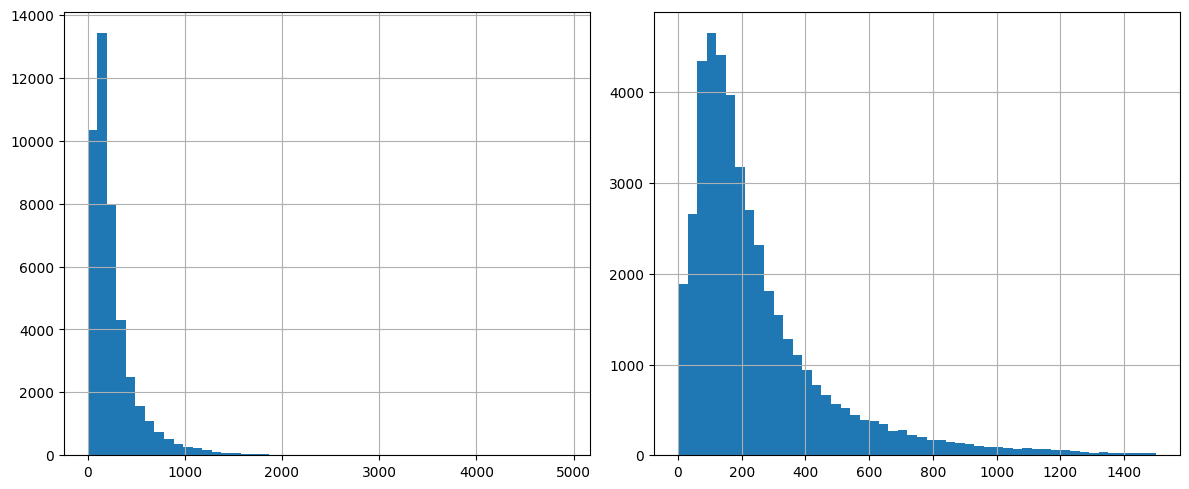

In [ ]:
import matplotlib.pyplot as plt

# 2.2

X_age25 = X[X['age'] > 25]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
X_age25['duration'].hist(bins=50)

plt.subplot(1, 2, 2)
X_age25['duration'].hist(range=[0, 1500], bins=50)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# 2.2

def plot_duration_by_age(age_threshold):
    X_age_filtered = X[X['age'] > age_threshold]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    X_age_filtered['duration'].hist(bins=50)
    plt.title(f'Duration for Age > {age_threshold} (All values)')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    X_age_filtered['duration'].hist(range=[0, 1500], bins=30)
    plt.title(f'Duration for Age > {age_threshold} (0-1500s)')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

interact(plot_duration_by_age, age_threshold=widgets.IntSlider(min=0, max=X['age'].max(), step=1, value=25));

interactive(children=(IntSlider(value=25, description='age_threshold', max=95), Output()), _dom_classes=('widg…

In [ ]:
# 2.3
t = 360
X_dur_filt = X[X['duration'] > t]
print(X.shape[0], X_dur_filt.shape[0])

45211 9354


In [ ]:
X_dur_filt_pos = X_dur_filt[y['y'] == 'yes']
print(X_dur_filt_pos.shape[0])

3046


/tmp/ipython-input-3010213469.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_dur_filt_pos = X_dur_filt[y['y'] == 'yes']


In [ ]:
print(y.shape[0], X.shape[0])

45211 45211


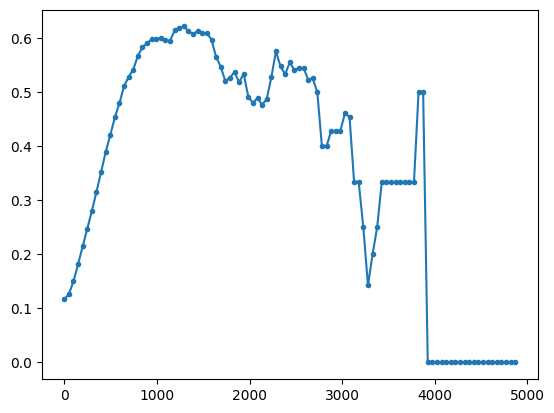

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_yes_percentage(t):
  X_dur_filt = X[X['duration'] > t]
  X_dur_filt_pos = X_dur_filt[X_dur_filt['y'] == 'yes']
  if X_dur_filt.empty:
    return np.nan
  return X_dur_filt_pos.shape[0] / X_dur_filt.shape[0]


t_values = np.linspace(0, X["duration"].max(), 100)
percentages = [get_yes_percentage(t) for t in t_values]

plt.plot(t_values, percentages, marker="o", markersize=3)
plt.show()

In [ ]:
test = X.sort_values(by='balance', ascending=False)
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,NaN,no
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,NaN,no
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
41693,60,retired,married,primary,no,71188,no,no,cellular,6,oct,205,1,-1,0,NaN,no


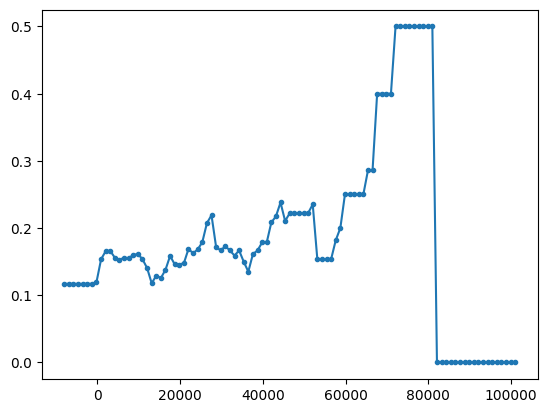

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_yes_percentage(t):
  X_dur_filt = X[X['balance'] > t]
  X_dur_filt_pos = X_dur_filt[X_dur_filt['y'] == 'yes'] == 'yes'
  if X_dur_filt.empty:
    return np.nan
  return X_dur_filt_pos.shape[0] / X_dur_filt.shape[0]


t_values = np.linspace(X["balance"].min(), X["balance"].max(), 100)
percentages = [get_yes_percentage(t) for t in t_values]

plt.plot(t_values, percentages, marker="o", markersize=3)
plt.show()

In [ ]:
baseline = (y['y'] == 'yes').mean()
print(baseline)

0.11698480458295547


In [ ]:
X['y'] = y['y']

In [ ]:
for t in [2000, 4000, 6000, 8000]:
    subset = X[X['balance'] > t]
    print(f"t = {t}, liczba klientów = {len(subset)}, procent YES = {(subset['y'] == 'yes').mean() * 100:.2f}%")


t = 2000, liczba klientów = 8501, procent YES = 16.57%
t = 4000, liczba klientów = 3898, procent YES = 15.85%
t = 6000, liczba klientów = 2108, procent YES = 15.13%
t = 8000, liczba klientów = 1279, procent YES = 15.25%
